In [1]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [2]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('C:/Users/user/Documents/카카오워크 받은 파일/human+activity+recognition+using+smartphones/UCI HAR Dataset/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('C:/Users/user/Documents/카카오워크 받은 파일/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('C:/Users/user/Documents/카카오워크 받은 파일/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('C:/Users/user/Documents/카카오워크 받은 파일/human+activity+recognition+using+smartphones/UCI HAR Dataset/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('C:/Users/user/Documents/카카오워크 받은 파일/human+activity+recognition+using+smartphones/UCI HAR Dataset/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

print("## 학습 피처 데이터 정보 ##")
print(X_train.info())

## 학습 피처 데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [4]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


In [5]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(random_state=0)
svm_clf.fit(X_train, y_train)

pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, pred_svm)
print('SVM 정확도: {0:.4f}'.format(accuracy_svm))


SVM 정확도: 0.9505


In [6]:
#DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

pred_dt = dt_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, pred_dt)
print('의사 결정 트리 정확도: {0:.4f}'.format(accuracy_dt))


의사 결정 트리 정확도: 0.8595


In [7]:
#LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression(random_state=0)
lr_clf.fit(X_train, y_train)

pred_lr = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test, pred_lr)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_lr))


로지스틱 회귀 정확도: 0.9579


In [8]:
#Linear_SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_clf = SVC(kernel='linear', random_state=0)
svm_clf.fit(X_train, y_train)

pred_svm = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, pred_svm)
print('선형 SVM 정확도: {0:.4f}'.format(accuracy_svm))


선형 SVM 정확도: 0.9640


In [9]:
from sklearn.model_selection import GridSearchCV

param = {
    "max_depth" : [10, 20, None],
    "min_samples_leaf" : [1, 6],
    "max_features" : [100, None]
}


gs = GridSearchCV(dt_clf,param_grid=param,cv=5, refit=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': [100, None],
                         'min_samples_leaf': [1, 6]})

<Axes: title={'center': 'Feature importance top 10'}, xlabel='None', ylabel='None'>

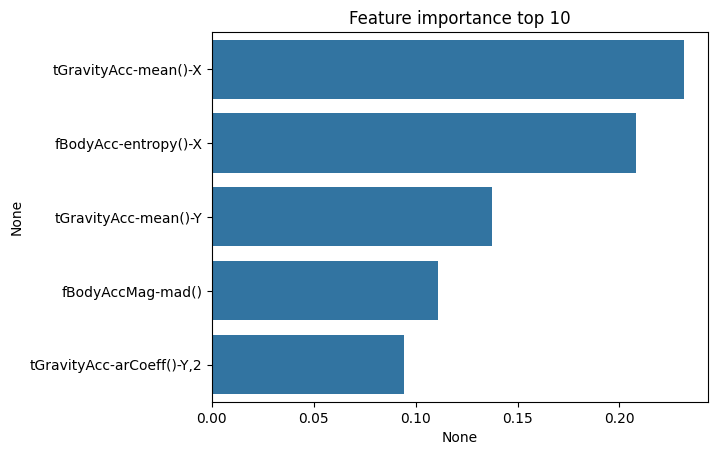

In [10]:
best_dt = gs.best_estimator_
feature_importances = best_dt.feature_importances_
ftr_importances = pd.Series(feature_importances, index=X_train.columns)

ftr_top5 = ftr_importances.sort_values(ascending=False)[:5]

plt.title("Feature importance top 10")
sns.barplot(x=ftr_top5, y=ftr_top5.index)

In [11]:
top_features = ftr_top5.index.tolist()  # 머신러닝 모델에서 추출한 상위 10개 피쳐

X_train_top_features = X_train[top_features]
X_test_top_features = X_test[top_features]


In [12]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


이 위는 건들게 없다! 피쳐도 10개 추렸다!

In [13]:
n_steps = 128
X_train_3d, y_train_2d = split_sequences(X_train_top_features.values, n_steps)

X_test_3d, y_test_2d = split_sequences(X_test_top_features.values, n_steps)


# X_train_3d 및 X_test_3d는 3D
print("X_train_3d shape:", X_train_3d.shape)
print("X_test_3d shape:", X_test_3d.shape)
print(y_train_2d.shape)
print(y_test_2d.shape)

X_train_3d shape: (7225, 128, 4)
X_test_3d shape: (2820, 128, 4)
(7225,)
(2820,)


In [14]:
# Convert output variables to categorical for CNN
num_classes = 6
y_train_2d_OH = to_categorical(y_train_2d, num_classes)
print(y_train_2d_OH.shape)

y_test_2d_OH = to_categorical(y_test_2d, num_classes)
print(y_test_2d_OH.shape)


(7225, 6)
(2820, 6)


In [15]:
## set number of epochs and batch size
batch_size = 64
validation_split = 10

In [16]:
# 모델 입력 형태 변경
n_timesteps, n_features = X_train_3d.shape[1], X_train_3d.shape[2]  # 수정된 부분
n_outputs = y_train_2d_OH.shape[1]

# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# fit network
train_epochs = 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 64)           832       
                                                                 
 flatten (Flatten)           (None, 8064)              0         
                                                                 
 dense (Dense)               (None, 128)               1032320   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1033926 (3.94 MB)
Trainable params: 1033926 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
n_timesteps, n_features, n_outputs = X_train_3d.shape[1], X_train_3d.shape[2], y_train_2d_OH.shape[1]

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dropout(0.5))
model.add(LSTM(100, return_sequences=False))  # return_sequences를 False로 변경
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train_3d, y_train_2d_OH, epochs=train_epochs, batch_size=batch_size, verbose=True, validation_split=0.2)

Epoch 1/10
91/91 [==============================] - 7s 65ms/step - loss: 0.1289 - accuracy: 0.9777 - val_loss: 1.4016e-04 - val_accuracy: 1.0000
Epoch 2/10
91/91 [==============================] - 6s 61ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 8.9180e-05 - val_accuracy: 1.0000
Epoch 3/10
91/91 [==============================] - 6s 62ms/step - loss: 0.0026 - accuracy: 0.9998 - val_loss: 7.1016e-05 - val_accuracy: 1.0000
Epoch 4/10
91/91 [==============================] - 6s 62ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 7.0814e-05 - val_accuracy: 1.0000
Epoch 5/10
91/91 [==============================] - 6s 62ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 6.1200e-05 - val_accuracy: 1.0000
Epoch 6/10
91/91 [==============================] - 6s 62ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 5.8406e-05 - val_accuracy: 1.0000
Epoch 7/10
91/91 [==============================] - 6s 63ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 5.0210e-05 - val_ac

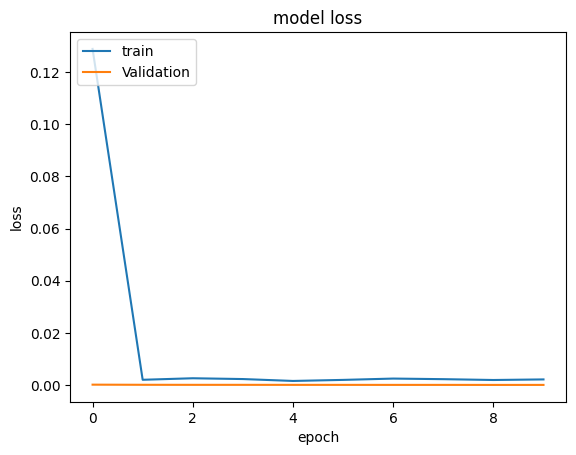

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')